# Project: Investigating TMDb MOVIE DATA
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
    <li><a href="#reference">Reference</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The data set I have selected is the TMDb data set which contains information about movies, their ratings and revenues.
> The Data is collected from TMDb. Earlier it was collected from IMDb but due to a DMCA take down request, now TMDb data set is provided with imdb_id to make conversion easy.

In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#Reading tmdb csv file and storing into variable
dataset = pd.read_csv('tmdb-movies.csv')
#First Look at the Data.
dataset.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

Now I am going to check how many unique values exist in each columns.

In [3]:
dataset.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

Now let's check for NULL Values.

In [4]:
dataset.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### My Observations about the dataset :-
<ul>
    <li>imdb_id column provides data about the movie on imdb site, so not really helpful information for us.</li>
    <li>vote_average column contains useless information since it does not represent every person who watched the movie.
</ul>  

### What Questions can be answered from this dataset?
Looking at this database, we can think about-
<ul>
   <li>Which genres are most popular from year to year? What kinds of properties are associated with movies that have high revenues?</li>
<li>Which is the most commercially succesfull movie of all time?</li>
<li>Which year was the Golden Year for HollyWood(or Which year most movies made profit)?</li>
</ul>

### What needs to be Cleaned?
We have to find out which columns in the datasets can be useful in answering these questions and We have to remove other irrelevant columns.
<ul>
<li>Delete those rows which have budget=0 or revenue=0, meaning these are movies with insufficient information and hence not needed by us.</li>

<li>Remove the Duplicate rows, if any.</li>

<li>If any movie has runtime of 0 then remove it.</li>

<li>The 'release_date' column must be converted into date format.</li>

<li>Checking if all columns are in the desired data type, if not then we have to change it.</li>

<li>Finally, we will also remove unnecessary columns. </li>
</ul>




### Questions which we will Answer :-
<ol>
    <li>General questions about the dataset.</li>
    <ol type = 'A'>
        <li>Which movie earns the most and least profit?</li>
        <li>Which movie had the greatest and least runtime?</li>
        <li>In which year we had the most movies making profits?</li>
    </ol>
    <li>What are the similar characteristics that the most profitable movie has?</li>
    <ol type = 'A'>
        <li>Which genre were more successful?</li>
        <li>Which month released highest number of movies in all of the years? And which month made the most profit?</li>
    </ol>
</ol>
<br>

-----

<br>
## Data Cleaning

First, lets clean up the columns.
We will only keep the columns we need.

Columns to delete -  id, imdb_id, popularity, budget_adj, revenue_adj, homepage, keywords, overview, production_companies, vote_count and vote_average.

In [5]:
# a list of columns that needs to be deleted
del_col = [ 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average']

#deleting the columns from the database
dataset = dataset.drop(del_col, 1)
#now take a look at this new dataset
dataset.head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,4/1/15,2015


Now checking for duplicate records and remvoing them from the Data Frame.

In [6]:
dataset.drop_duplicates(keep = 'first', inplace = True)
dataset.head(5)

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,4/1/15,2015


Now, lets figure out which movies have a value of `'0'` in their `budget` or `revenue`, and then we will delete those movies from dataset.

In [7]:
check_row = ['budget', 'revenue']    #list of column names that needs to be checked

#this will replace the value of '0' to NaN of columns given in the list
dataset[check_row] = dataset[check_row].replace(0, np.NaN)

#now we will drop any row which has NaN values in any of the column of the list (check_row) 
dataset.dropna(subset = check_row, inplace = True)

#showing the dataset
dataset.head(5)

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,4/1/15,2015


<a id='wrangling'></a>
## Data Wrangling

Now we need to convert the data type of `'release_date'` column to date format

In [8]:
dataset.release_date = pd.to_datetime(dataset['release_date'])
dataset.head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2015


Now the `'release_date'` column has been changed to date format (year-month-day).

Lets see if all the columns have the appropriate data type.

In [9]:
dataset.dtypes

budget                   float64
revenue                  float64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis

Lets figure out the characteristics of movies.

In [10]:
dataset.insert(2, 'profit', dataset['revenue'] - dataset['budget']) #create new entry in dataset
dataset.head()

,budget,revenue,profit,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000.0,1.513529e+09,1.363529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000.0,3.784364e+08,2.284364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000.0,2.952382e+08,1.852382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,200000000.0,2.068178e+09,1.868178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,190000000.0,1.506249e+09,1.316249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2015


**Q1-A) Which movie earns the most and least profit?**

In [11]:
#a function which calculates lowest and highest values of columns taking column name as arguments

def highest_lowest(column_name):
    
    #highest : taking the index value of the highest number in profit column
    highest = dataset[column_name].idxmax()
    #calling by index number,storing that row info to a variable
    highest_details = pd.DataFrame(dataset.loc[highest])
    
    #lowest
    #same processing as above
    lowest = dataset[column_name].idxmin()
    lowest_details = pd.DataFrame(dataset.loc[lowest])
    two_in_one_data = pd.concat([highest_details, lowest_details], axis = 1)
    return two_in_one_data

highest_lowest('profit')

,1386,2244
budget,2.37e+08,4.25e+08
revenue,2.78151e+09,1.10876e+07
profit,2.54451e+09,-4.13912e+08
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
release_date,2009-12-10 00:00:00,2010-12-02 00:00:00


The **first column** shows the highest profit made by a movie and **second column** shows the highest loss made by a movie in this dataset. 

As we can see the film Directed by `James Cameron`, `Avatar` has the highest profit in all, making over `$2.5B` in profit, in this dataset. 

And the most in loss movie in this dataset is `The Warriors Way`, going in loss by more than `$400M`, was directed by `Singmoo Lee`.

**Q1-B) Which movie had the greatest and least runtime?**

In [12]:
highest_lowest('runtime')

,2107,5162
budget,1.8e+07,10
revenue,871279,5
profit,-1.71287e+07,-5
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
tagline,The man who hijacked the world,NaN
runtime,338,15
genres,Crime|Drama|Thriller|History,Science Fiction|Animation
release_date,2010-05-19 00:00:00,2003-06-02 00:00:00


The **first column** shows the runtime of the highest and **second  column**, the lowest runtime of a movie.
So `Carlos` movie has the highest Runtime of `338 min`, that's approx 3.5 hrs.
The name of the movie with shortest runtime is `Kid's Story`, that's approx 15 min.

**Q1-C) In which year we had the most movies making profits?**

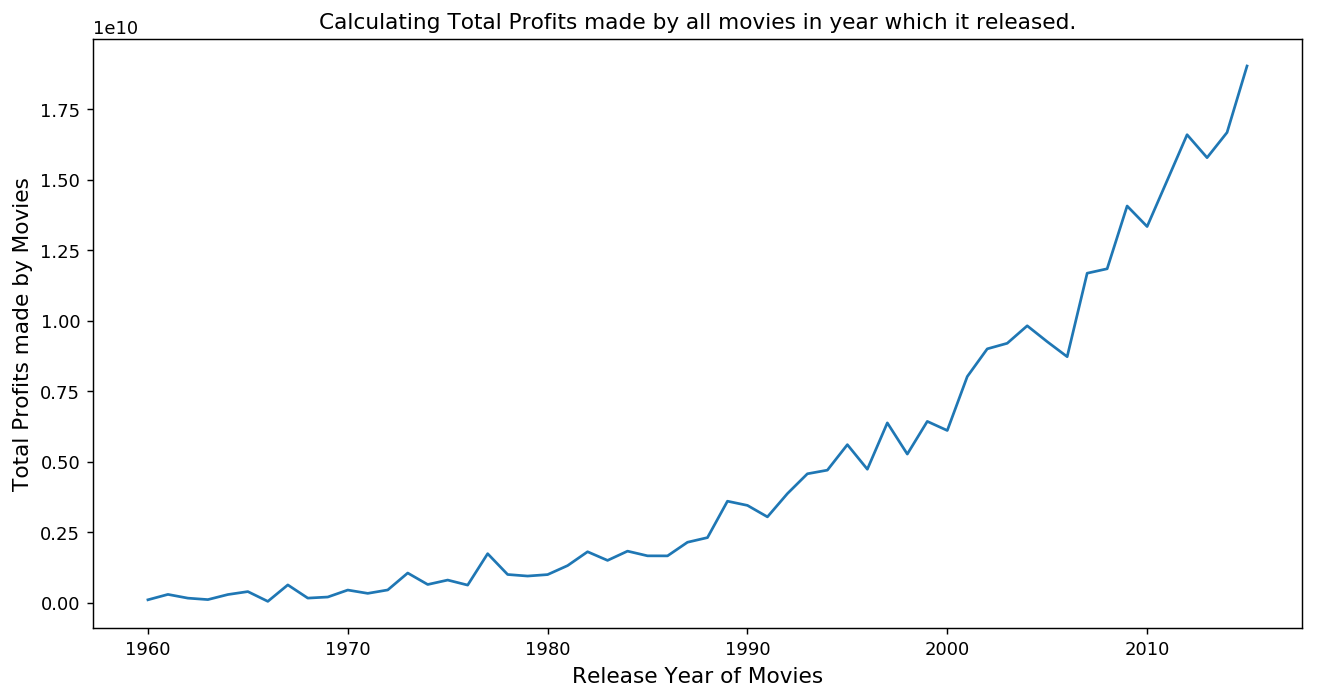

In [13]:
#Line plot used for this
#Since we want to know the profits of movies for every year we need to group all the movies for those years

#the groupby function below collects all the movies for that year and then the profits of all those movies for that years is added up
#and storing all of this in a variable
profits_each_year = dataset.groupby('release_year')['profit'].sum()
plt.figure(figsize=(12,6), dpi = 130)

plt.xlabel('Release Year of Movies', fontsize = 12)    #labeling x-axis
plt.ylabel('Total Profits made by Movies', fontsize = 12)   #labeling y-axis
plt.title('Calculating Total Profits made by all movies in year which it released.')    #title of the plot
plt.plot(profits_each_year)
plt.show()

* The year `2010`, shows us the highest peak, having the highest profit than in any year.
* At the year `2000`, profits were around `8 billion dollars`, but in just 10 years it increased by 10+ billion dollars. 
* After 1990, the profit has increased rapidly after each decade. This may be due to arrival of Personal Computers and Internet which allows people to watch movies at their homes.

For convenience, I have shown which year had the most profit. Also we will take a look at the profits of each year with exact figures.

In [14]:
profits_each_year.idxmax()

2015

In [15]:
#storing the values in the the form of DataFrame just to get a clean and better visual output
profits_each_year = pd.DataFrame(profits_each_year)
#printing out
profits_each_year.tail()

,profit
release_year,
2011,1.496669e+10
2012,1.659685e+10
2013,1.578274e+10
2014,1.667620e+10
2015,1.903215e+10


`2015` was the year where movies made the highest profit of about `19+ billion dollars` which released in that year.

<br>
We are now done with exploring the dataset given. Now We will identify the similar characteristics of popular movies.

<br>
**Q2) What are the similar characteristics that the most profitable movie has?**

Before answering this question, we need to first clean the dataset so we only have the data of movies that made significant profit.

**Let's take only the movies who made profits of 10M dollars or more.**

In [16]:
profit_movie_data = dataset.query('profit >= 10000000')

#reindexing new dataframe
profit_movie_data.index = range(len(profit_movie_data))
#will initialize dataframe from 1 instead of 0
profit_movie_data.index = profit_movie_data.index + 1

profit_movie_data.head(2)

,budget,revenue,profit,original_title,cast,director,tagline,runtime,genres,release_date,release_year
1,150000000.0,1.513529e+09,1.363529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
2,150000000.0,3.784364e+08,2.284364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015


In [17]:
#number of rows of a dataframe
len(profit_movie_data)

2268

In [18]:
def prof_avg_fuc(column_name):
    return profit_movie_data[column_name].mean()

In [19]:
#mean of runtime
prof_avg_fuc('runtime')

111.33818342151676

The mean time for movies making significant profits is likely similar to the mean runtime of movies that we found before of `109.2`. Difference is of 2 minutes.

In [20]:
#function which will take any column as argument from which data is need to be extracted and keep track of count
def extract_data(column_name):
    #will take a column, and separate the string by '|'
    all_data = profit_movie_data[column_name].str.cat(sep = '|')
    all_data = pd.Series(all_data.split('|'))    #giving pandas series and storing the values separately
    count = all_data.value_counts(ascending = False)    #this will us value in descending order
    
    return count

**Q2-A) Which genre were more successful?**

In [21]:
#this will variable will store the return value from a function
genre_count = extract_data('genres')
#shwoing top 5 values
genre_count.head()

Drama        903
Comedy       828
Thriller     693
Action       690
Adventure    524
dtype: int64

Lets visualize this with a plot.

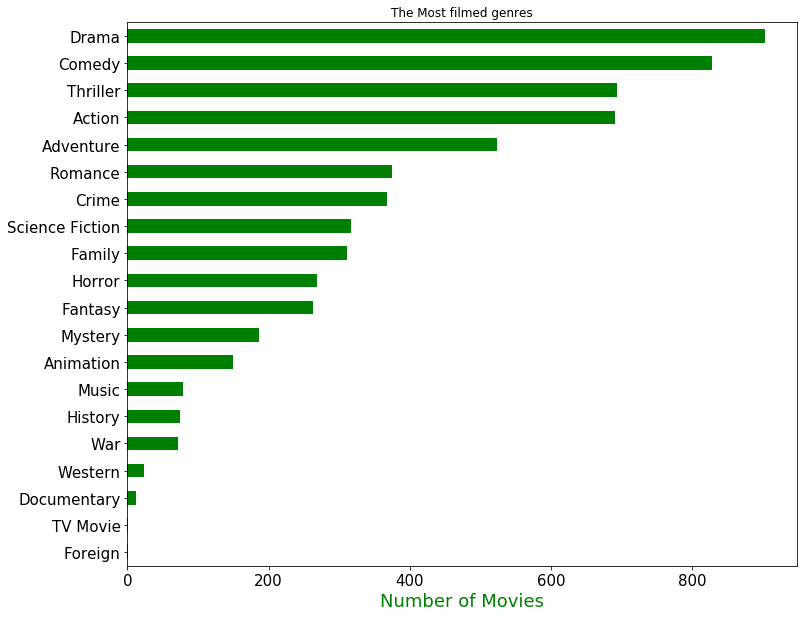

In [22]:
#we want plot to plot points in descending order top to bottom
#hence lets give the series in ascending order
genre_count.sort_values(ascending = True, inplace = True)

ax = genre_count.plot.barh(color = 'green', fontsize = 15)    #initializing plot
ax.figure.set_size_inches(12, 10)    #giving the figure size(width, height)
ax.set_xlabel('Number of Movies', color = 'g', fontsize = '18')    #x-label
ax.set(title = 'The Most filmed genres')    #giving a title

#shwoing the plot
plt.show()

So, `Action, Drama, Thriller and Comedy genres` are the most as visualized but Drama takes the prize, about `903 movies` have genres comedy which make $10M+ in profit. These four genres have more number of movies than rest of the genres as shown by visualization. Probability of earning more than \$10M for these genres are higher, but still other genres count too and it again depends on lots of other influential factors that come in play.

**Q2-B) Which month released highest number of movies in all of the years? And which month made the most profit?**

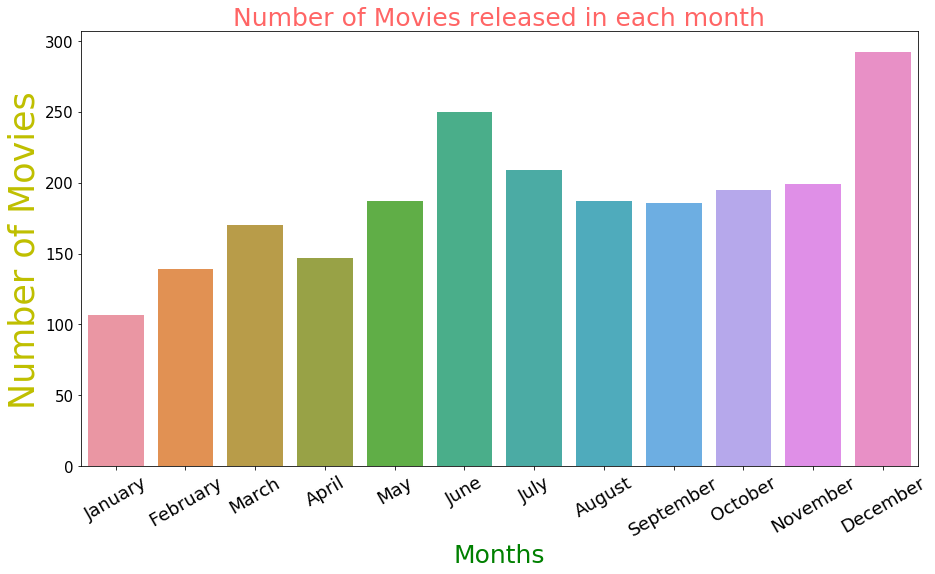

In [23]:
#for answering this question we need to group all of the months of years and then calculate the profits of those months
#giving a new dataframe which gives 'release-date' as index
index_release_date = profit_movie_data.set_index('release_date')

#now we need to group all the data by month, since release date is in form of index, we extract month from it
groupby_index = index_release_date.groupby([(index_release_date.index.month)])

#this will give us how many movies are released in each month
monthly_movie_count = groupby_index.profit.count()

#converting table to a dataframe
monthly_movie_count= pd.DataFrame(monthly_movie_count)

#list of months
month_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

monthly_movie_count_bar = sns.barplot(x = monthly_movie_count.index, y = monthly_movie_count.profit, data = monthly_movie_count)

#setting size of the graph
monthly_movie_count_bar.figure.set_size_inches(15,8)

#setting the title and customizing
monthly_movie_count_bar.axes.set_title('Number of Movies released in each month', color="r", fontsize = 25, alpha = 0.6)
monthly_movie_count_bar.set_xlabel("Months", color="g", fontsize = 25)    #setting x-label
monthly_movie_count_bar.set_ylabel("Number of Movies", color="y", fontsize = 35)    #setting y-label

#customizing axes values
monthly_movie_count_bar.tick_params(labelsize = 15, labelcolor="black")

#rotating the x-axis values to make it readable
monthly_movie_count_bar.set_xticklabels(month_list, rotation = 30, size = 18)
#display
plt.show()

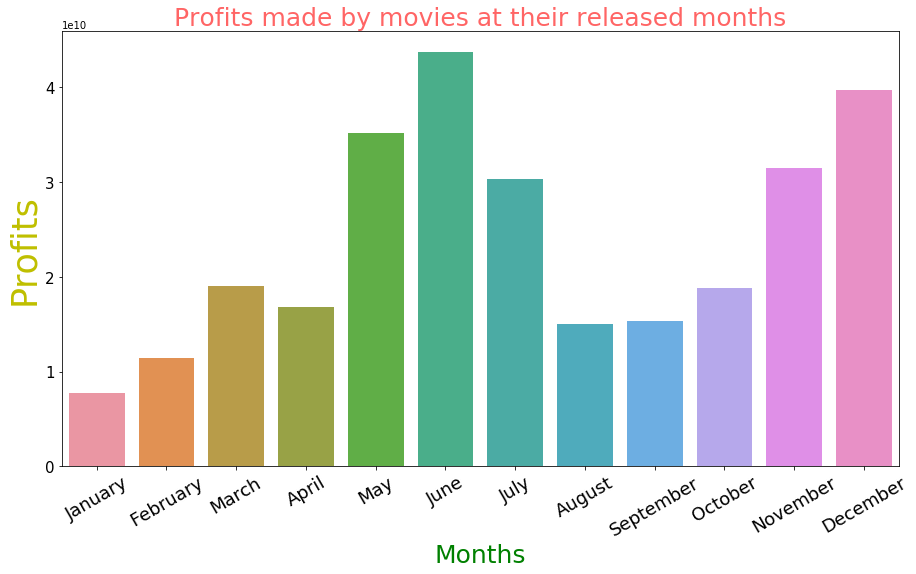

In [24]:
#finding the second part of this question

#now since the data is grouped by month, we add 'profit' values to respective months, saving all this to a new variable
monthly_profit = groupby_index.profit.sum()

#converting table to a dataframe
monthly_profit = pd.DataFrame(monthly_profit)

#giving seaborn bar plot to visualize the data
#giving values to our graph
monthly_profit_bar = sns.barplot(x = monthly_profit.index, y = monthly_profit.profit, data = monthly_profit)

#setting size of the graph
monthly_profit_bar.figure.set_size_inches(15,8)

#setting the title and customizing
monthly_profit_bar.axes.set_title('Profits made by movies at their released months', color="r", fontsize = 25, alpha = 0.6)

#setting x-label
monthly_profit_bar.set_xlabel("Months", color="g", fontsize = 25)
#setting y-label
monthly_profit_bar.set_ylabel("Profits", color="y", fontsize = 35)

#customizing axes values
monthly_profit_bar.tick_params(labelsize = 15, labelcolor="black")

#rotating the x-axis values to make it readable
monthly_profit_bar.set_xticklabels(month_list, rotation = 30, size = 18)

#show the plot
plt.show()

Seeing the visualizations of both graphs we see similar trend. Where there are more movie released there is more profit and vice versa but not for one month i.e `December`. December is the month where most movie get released but when compared to profits it ranks second. This means that december month has high release rate but less profit margin. The month of June where we have around `250 movie` releases, which is second highest, is the highest in terms of making profits.

This visualization doesn't prove us that if we release a movie in those months we will earn more $10M. It just makes us think that the chances are higher, again it depends on other influential factors, such as directors, story, cast etc.
<br>

--------

<br>
<a id='conclusions'></a>
## Conclusion

If one who wants to increase his chances of showing one of the best and most profitable movie, he can:
                            
** -Choose these genre** - Action, Adventure, thriller, Comedy, Drama.

** -Choose these release months** - May, June, July, November, December.

By doing all this, his probability of making a profitable movie would be higher. And also the runtime of the movie should be around 111 min (mean runtime of movies with \$10M+).

### Limitations

*This analysis was done considering the movies which had a significant amount of profit of around 50 million dollar. This might not be completely error free but by following these suggestion one can increase the probability of a movie to become a hit. Moreover we are not sure if the data provided to us is completel corect and up-to-date. As mentioned before the budget and revenue column do not have currency unit, it might be possible different movies have budget in different currency according to the country they are produce in. So a disparity arises here which can state the complete analysis wrong. Dropping the rows with missing values also affected the overall analysis.*

<a id='reference'></a>
## Reference
* [Dataset download link](https://www.google.com/url?q=https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv&sa=D&ust=1520456065743000&usg=AFQjCNE04YzC40qAErEhbIdpbYEsN6oVKA)
* [About TMDb](https://www.themoviedb.org/about?language=en)
* [Sort DataFrame](https://pandas.pydata.org/pandas-docs/version/0.19/generated/pandas.DataFrame.sort.html)